In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot as plt

In [5]:
import os
os.getcwd()

'C:\\Users\\mdsou'

In [6]:
os.chdir(r'C:\Users\mdsou\Downloads')

In [7]:
excel_file = 'DATALOG with Cleaning.xlsx'

In [8]:
sheet_names = pd.read_excel(excel_file, sheet_name=None)

In [6]:
data_baseline['Target'] = 0
df_ethanol_123['Target'] = 1
df_ethanol_200['Target'] = 2
df_ethanol_161['Target'] = 3
df_methanol_292['Target'] = 4
df_methanol_137['Target'] = 5
df_methanol_164['Target'] = 5
df_isopropanol_217['Target'] = 7
df_isopropanol_117['Target'] = 8
df_isopropanol_143['Target'] = 9

NameError: name 'data_baseline' is not defined

In [9]:
# Exclude the first two sheets from the list of sheet names
excluded_sheets = list(sheet_names.keys())[:3]
selected_sheets = [sheet for sheet in sheet_names if sheet not in excluded_sheets]

# LDA by Gas Class

In [8]:
df_combined = pd.DataFrame()

for sheet in selected_sheets:
    # Read each sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet, skiprows=2, usecols=range(12))
    df['Target'] = sheet
    df['Target'] = df['Target'].str.split().str[0]
    # Append the DataFrame to the combined DataFrame
    df_combined = df_combined.append(df, ignore_index=True)

C:\Users\mdsou\AppData\Local\Temp\ipykernel_18520\3671427250.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_18520\3671427250.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_18520\3671427250.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_18520\3671427250.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combine

In [9]:
output_file = 'combined_data.xlsx'
df_combined.to_excel(output_file, index=False)

print(f"Combined data has been saved to '{output_file}'.")

Combined data has been saved to 'combined_data.xlsx'.


In [10]:
df_combined.head()

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Blank,LDR (light sensor),Moisture,Nitric Oxide (NO),Target
0,4450.0,8331.0,8278.0,8289.0,8253.0,63443.0,25731.0,64504.0,52976.0,65353.0,65027.0,49055.0,Ethanol
1,9655.0,8373.0,8214.0,8276.0,8188.0,63524.0,27681.0,60254.0,52657.0,65223.0,65273.0,49009.0,Ethanol
2,14836.0,8255.0,8126.0,8293.0,8388.0,63513.0,29028.0,61159.0,52846.0,65345.0,65109.0,49053.0,Ethanol
3,20017.0,8314.0,7945.0,8267.0,8230.0,63601.0,29817.0,61726.0,52787.0,65318.0,65260.0,49007.0,Ethanol
4,25221.0,8258.0,7773.0,8275.0,8378.0,63579.0,30233.0,61887.0,52833.0,65245.0,65162.0,49015.0,Ethanol


In [11]:
df_combined.shape

(1575, 13)

In [12]:
columns_to_drop = [0,8,9,10]

In [13]:
#Drop all columns except sensor data
df_combined = df_combined.drop(df_combined.columns[columns_to_drop], axis=1)

In [14]:
df_combined

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Target
0,8331.0,8278.0,8289.0,8253.0,63443.0,25731.0,64504.0,49055.0,Ethanol
1,8373.0,8214.0,8276.0,8188.0,63524.0,27681.0,60254.0,49009.0,Ethanol
2,8255.0,8126.0,8293.0,8388.0,63513.0,29028.0,61159.0,49053.0,Ethanol
3,8314.0,7945.0,8267.0,8230.0,63601.0,29817.0,61726.0,49007.0,Ethanol
4,8258.0,7773.0,8275.0,8378.0,63579.0,30233.0,61887.0,49015.0,Ethanol
...,...,...,...,...,...,...,...,...,...
1570,8179.0,8259.0,8282.0,9842.0,63872.0,23036.0,65535.0,53185.0,Isopropanol
1571,8131.0,8273.0,8270.0,9827.0,63336.0,23037.0,65535.0,52942.0,Isopropanol
1572,8208.0,8273.0,8282.0,9778.0,63430.0,22939.0,65535.0,52799.0,Isopropanol
1573,8197.0,8259.0,8269.0,9800.0,63602.0,23325.0,65535.0,52451.0,Isopropanol


In [15]:
sensor_data = df_combined.iloc[:, :-1]  # Sensor data (features)
labels = df_combined.iloc[:, -1]   # Labels

In [16]:
sensor_data.drop(df_combined.columns[:1], axis=1, inplace=True)

In [17]:
sensor_data

,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO)
0,8278.0,8289.0,8253.0,63443.0,25731.0,64504.0,49055.0
1,8214.0,8276.0,8188.0,63524.0,27681.0,60254.0,49009.0
2,8126.0,8293.0,8388.0,63513.0,29028.0,61159.0,49053.0
3,7945.0,8267.0,8230.0,63601.0,29817.0,61726.0,49007.0
4,7773.0,8275.0,8378.0,63579.0,30233.0,61887.0,49015.0
...,...,...,...,...,...,...,...
1570,8259.0,8282.0,9842.0,63872.0,23036.0,65535.0,53185.0
1571,8273.0,8270.0,9827.0,63336.0,23037.0,65535.0,52942.0
1572,8273.0,8282.0,9778.0,63430.0,22939.0,65535.0,52799.0
1573,8259.0,8269.0,9800.0,63602.0,23325.0,65535.0,52451.0


In [18]:
labels.value_counts()

Ethanol        525
Methanol       525
Isopropanol    525
Name: Target, dtype: int64

# Plot

In [19]:
le = LabelEncoder()
y = le.fit_transform(labels)

In [26]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(sensor_data, y)

In [27]:
lda.explained_variance_ratio_

array([0.93498271, 0.06501729])

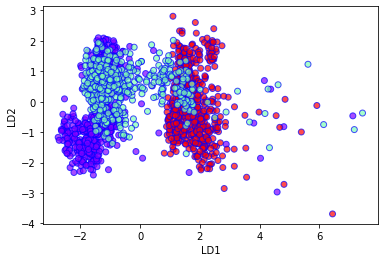

In [29]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# Split Training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(sensor_data, labels, test_size=0.3, random_state=5)

In [24]:
print(X_train)

      Nitrogen Dioxide (NO2)  Ethylene  Carbon Monoxide (CO)  \
577                   7557.0    8276.0                8570.0   
1162                  7461.0    8278.0                9342.0   
1508                  7858.0    8277.0                9671.0   
856                   7797.0    8271.0               10062.0   
1535                  8273.0    8278.0                9513.0   
...                      ...       ...                   ...   
1424                  6365.0    8291.0                9672.0   
1142                  6814.0    8281.0                8867.0   
998                   8268.0    8277.0                9726.0   
206                   6345.0    8280.0                8519.0   
867                   7968.0    8277.0               10480.0   

      Alcohol- Acetone  Alcohol  Ammonia (NH3)- Ethanol  Nitric Oxide (NO)  
577            63943.0  23931.0                 65535.0            48730.0  
1162           63886.0  29066.0                 65535.0            48440.0  


In [25]:
print(y_train)

577        Methanol
1162    Isopropanol
1508    Isopropanol
856        Methanol
1535    Isopropanol
           ...     
1424    Isopropanol
1142    Isopropanol
998        Methanol
206         Ethanol
867        Methanol
Name: Target, Length: 1102, dtype: object


In [39]:
clf = LinearDiscriminantAnalysis()

In [47]:
x_lda = clf.fit_transform(X_train, y_train)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.7568710359408034


In [152]:
import matplotlib.pyplot as plt

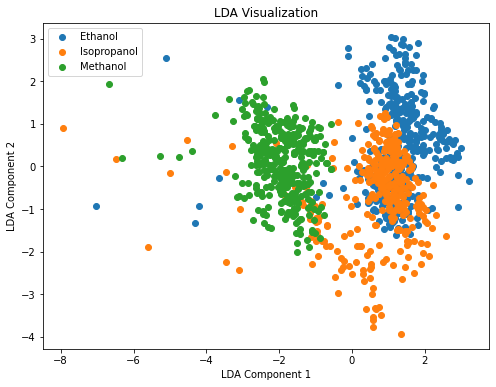

In [52]:
targets = np.unique(labels)

plt.figure(figsize=(8, 6))
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 1], label=target)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.legend()
plt.show()

In [54]:
X_test_lda = clf.transform(X_test)

In [ ]:
targets = np.unique(y_train)

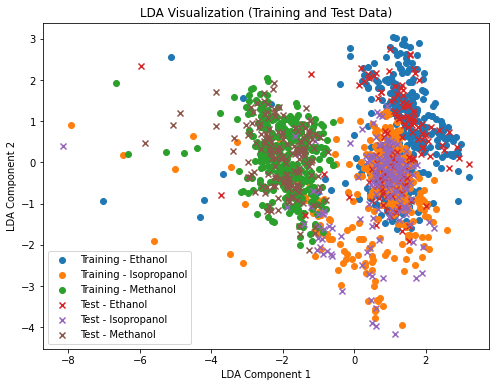

In [56]:
plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 1], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 1], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

# Input for Neural network

In [67]:
df_combined.head()

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Blank,LDR (light sensor),Moisture,Nitric Oxide (NO),Target
0,4450.0,8331.0,8278.0,8289.0,8253.0,63443.0,25731.0,64504.0,52976.0,65353.0,65027.0,49055.0,Ethanol
1,9655.0,8373.0,8214.0,8276.0,8188.0,63524.0,27681.0,60254.0,52657.0,65223.0,65273.0,49009.0,Ethanol
2,14836.0,8255.0,8126.0,8293.0,8388.0,63513.0,29028.0,61159.0,52846.0,65345.0,65109.0,49053.0,Ethanol
3,20017.0,8314.0,7945.0,8267.0,8230.0,63601.0,29817.0,61726.0,52787.0,65318.0,65260.0,49007.0,Ethanol
4,25221.0,8258.0,7773.0,8275.0,8378.0,63579.0,30233.0,61887.0,52833.0,65245.0,65162.0,49015.0,Ethanol


In [72]:
len(df_combined)

1575

In [77]:
df = pd.read_excel('combined_data.xlsx')

In [79]:
target = df['Target'].value_counts()

In [81]:
target

Ethanol        525
Methanol       525
Isopropanol    525
Name: Target, dtype: int64

In [58]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [89]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                192       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 3)                 195       
                                                                 
Total params: 16,963
Trainable params: 16,963
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
history = model.fit(x_lda, y_train_encoded, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
35/35 [==============================] - 1s 1ms/step - loss: 0.7275 - accuracy: 0.6851
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7296
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7350
Epoch 4/20
35/35 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7423
Epoch 5/20
35/35 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7595
Epoch 6/20
35/35 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7514
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7704
Epoch 8/20
35/35 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7750
Epoch 9/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7877
Epoch 10/20
35/35 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7813
Epoch 11/20
35/35 [

In [92]:
# Step 7: Evaluate the trained model
test_loss, test_acc = model.evaluate(X_test_lda, y_test_encoded)
print(f'Test accuracy: {test_acc}')

15/15 [==============================] - 1s 1ms/step - loss: 0.3929 - accuracy: 0.8203
Test accuracy: 0.8202959895133972


In [457]:
# Step 8: Make predictions using the trained model
predictions = model.predict(X_test_lda)

[['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']
 ['Ethanol 200ppm']


# Separate and predict by concentration

In [5]:
excel_file = 'DATALOG with Cleaning.xlsx'

In [8]:
sheet_names = pd.read_excel(excel_file, sheet_name=None)

In [10]:
# Exclude the first two sheets from the list of sheet names
excluded_sheets = list(sheet_names.keys())[:3]
selected_sheets = [sheet for sheet in sheet_names if sheet not in excluded_sheets]

In [11]:
selected_sheets = selected_sheets[:-1]

In [12]:
print(excluded_sheets)
print(selected_sheets)

['Data Info', 'Cleaning', 'Baseline']
['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm', 'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm', 'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm']


In [ ]:
"""data_baseline['Target'] = 0
df_ethanol_123['Target'] = 1
df_ethanol_200['Target'] = 2
df_ethanol_161['Target'] = 3
df_methanol_292['Target'] = 4
df_methanol_137['Target'] = 5
df_methanol_164['Target'] = 5
df_isopropanol_217['Target'] = 7
df_isopropanol_117['Target'] = 8
df_isopropanol_143['Target'] = 9"""

In [11]:
df_comb_train = pd.DataFrame()
df_comb_test = pd.DataFrame()

for sheet in selected_sheets:
    # Read each sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet, skiprows=2, usecols=range(12))
    df['Target'] = sheet
    # Take the first 118 rows for training data
    train_data = df.iloc[:118, :]
    # Take the remaining 57 rows for test data
    test_data = df.iloc[118:, :]
    # Append the DataFrame to the combined DataFrame
    df_comb_train = df_comb_train.append(train_data, ignore_index=True)
    df_comb_test = df_comb_test.append(test_data, ignore_index=True)

C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3490265098.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb_train = df_comb_train.append(train_data, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3490265098.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb_test = df_comb_test.append(test_data, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3490265098.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb_train = df_comb_train.append(train_data, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3490265098.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

In [12]:
type(df_comb_train)

pandas.core.frame.DataFrame

In [13]:
df_comb_train

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Blank,LDR (light sensor),Moisture,Nitric Oxide (NO),Target
0,4450,8331,8278,8289,8253,63443,25731,64504,52976,65353,65027,49055,Ethanol 200ppm
1,9655,8373,8214,8276,8188,63524,27681,60254,52657,65223,65273,49009,Ethanol 200ppm
2,14836,8255,8126,8293,8388,63513,29028,61159,52846,65345,65109,49053,Ethanol 200ppm
3,20017,8314,7945,8267,8230,63601,29817,61726,52787,65318,65260,49007,Ethanol 200ppm
4,25221,8258,7773,8275,8378,63579,30233,61887,52833,65245,65162,49015,Ethanol 200ppm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,284442,8210,7983,8280,9624,63823,27736,65535,53064,65341,65113,48642,Isopropanol 143ppm
1058,289623,8182,7984,8287,9621,63760,27792,65535,53083,65135,65035,48375,Isopropanol 143ppm
1059,294806,8192,8003,8298,9645,63817,27783,65535,53099,65156,65031,48089,Isopropanol 143ppm
1060,299989,8192,8024,8283,9642,63729,27801,65535,53082,64949,65241,47775,Isopropanol 143ppm


In [14]:
df_comb_test

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Blank,LDR (light sensor),Moisture,Nitric Oxide (NO),Target
0,5077,8298,8278,8291,8288,63569,17661,64260,52412,65171,64809,48972,Ethanol 200ppm
1,10502,8320,8270,8284,8208,63255,22646,65535,52077,64888,64901,48970,Ethanol 200ppm
2,15914,8289,8288,8296,8399,63606,26367,65535,52195,64649,65019,48961,Ethanol 200ppm
3,21321,8347,8262,8274,8275,63555,27086,63028,51963,64932,65047,48949,Ethanol 200ppm
4,26731,8226,8278,8290,8223,63407,27836,60754,52061,65052,65005,48969,Ethanol 200ppm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,285909,8179,8259,8282,9842,63872,23036,65535,52228,64442,65008,53185,Isopropanol 143ppm
509,291316,8131,8273,8270,9827,63336,23037,65535,52056,64628,65125,52942,Isopropanol 143ppm
510,296717,8208,8273,8282,9778,63430,22939,65535,51986,64758,64984,52799,Isopropanol 143ppm
511,302119,8197,8259,8269,9800,63602,23325,65535,52143,64538,64852,52451,Isopropanol 143ppm


In [15]:
columns_to_drop = [0, 8, 10]

In [16]:
#Drop all columns except sensor data
df_comb_test = df_comb_test.drop(df_comb_test.columns[columns_to_drop], axis=1)
df_comb_train = df_comb_train.drop(df_comb_train.columns[columns_to_drop], axis=1)

In [17]:
print(df_comb_train['Target'].unique())

['Ethanol 200ppm' 'Ethanol 123ppm' 'Ethanol 161ppm' 'Methanol 292ppm'
 'Methanol 137ppm' 'Methanol 164ppm' 'Isopropanol 217ppm '
 'Isopropanol 117ppm' 'Isopropanol 143ppm']


In [ ]:
#output_file = 'combined_data2.xlsx'

In [60]:
df_comb_train.to_excel('train_data.xlsx', index=False)
df_comb_test.to_excel('test_data.xlsx', index=False)
#print(f"Combined data has been saved to '{output_file}'.")

Combined data has been saved to 'combined_data2.xlsx'.


In [44]:
data['Target'].unique()

array(['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm',
       'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm',
       'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm'],
      dtype=object)

In [66]:
X_train = df_comb_train.iloc[:, :-1]  # Sensor data (features)
y_train = df_comb_train.iloc[:, -1]   # Labels
X_test = df_comb_test.iloc[:, :-1]
y_test = df_comb_test.iloc[:, -1]

In [84]:
X_test.head()

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,LDR (light sensor),Nitric Oxide (NO)
0,8298,8278,8291,8288,63569,17661,64260,65171,48972
1,8320,8270,8284,8208,63255,22646,65535,64888,48970
2,8289,8288,8296,8399,63606,26367,65535,64649,48961
3,8347,8262,8274,8275,63555,27086,63028,64932,48949
4,8226,8278,8290,8223,63407,27836,60754,65052,48969


In [67]:
scaler = StandardScaler()
train_x_sc = scaler.fit_transform(X_train)
test_x_sc = scaler.transform(X_test)

In [72]:
train_x_sc

array([[ 2.54290809,  1.2503754 ,  0.79244975, ..., -0.98578032,
         1.11384702,  0.59206929],
       [ 3.02164941,  1.20416115, -0.30710415, ..., -6.25251865,
         0.15062923,  0.54740965],
       [ 1.67661427,  1.14061655,  1.13077403, ..., -5.13101319,
         1.05457207,  0.59012757],
       ...,
       [ 0.95850229,  1.05179853,  1.55367938, ...,  0.29186844,
        -0.34579839, -0.34578308],
       [ 0.95850229,  1.06696258,  0.28496334, ...,  0.29186844,
        -1.87953748, -0.65063364],
       [ 1.4030478 ,  1.07057307,  0.1158012 , ...,  0.29186844,
         0.89897536, -0.94383386]])

In [70]:
train_x_sc.shape

(1062, 9)

In [108]:
y_train.value_counts()

Ethanol 200ppm         118
Ethanol 123ppm         118
Ethanol 161ppm         118
Methanol 292ppm        118
Methanol 137ppm        118
Methanol 164ppm        118
Isopropanol 217ppm     118
Isopropanol 117ppm     118
Isopropanol 143ppm     118
Name: Target, dtype: int64

In [109]:
# Find percentage
y_train.value_counts()/len(y_train)

Ethanol 200ppm         0.111111
Ethanol 123ppm         0.111111
Ethanol 161ppm         0.111111
Methanol 292ppm        0.111111
Methanol 137ppm        0.111111
Methanol 164ppm        0.111111
Isopropanol 217ppm     0.111111
Isopropanol 117ppm     0.111111
Isopropanol 143ppm     0.111111
Name: Target, dtype: float64

In [68]:
clf = LinearDiscriminantAnalysis()

In [104]:
x_lda = clf.fit_transform(X_train, y_train)

In [105]:
y_pred = clf.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.17738791423001948


In [88]:
import matplotlib.pyplot as plt

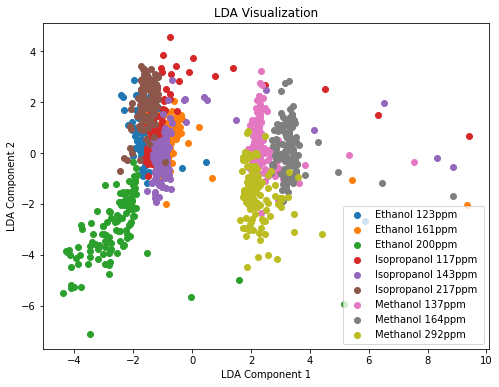

In [89]:
targets = np.unique(labels)

plt.figure(figsize=(8, 6))
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 1], label=target)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.legend()
plt.show()

In [90]:
X_test_lda = clf.transform(X_test)

In [91]:
targets = np.unique(y_train)

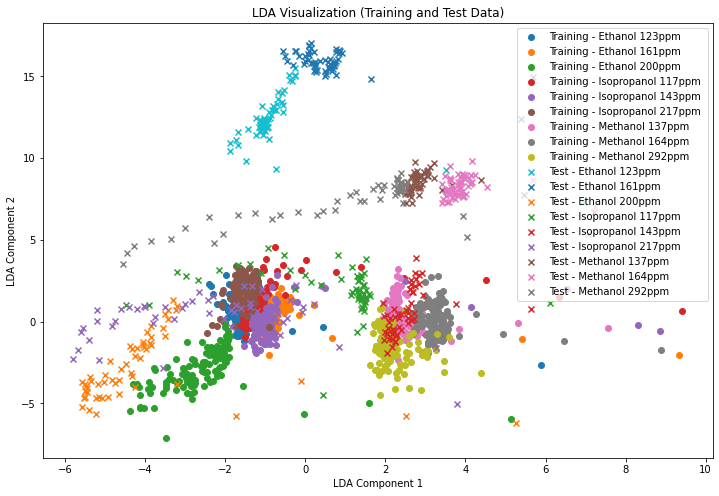

In [94]:
plt.figure(figsize=(12, 8))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 1], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 1], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

# Poor Results - Try without Scaling

In [119]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [120]:
excel_file = 'DATALOG with Cleaning.xlsx'

In [121]:
sheet_names = pd.read_excel(excel_file, sheet_name=None)

In [122]:
# Exclude the first two sheets from the list of sheet names
excluded_sheets = list(sheet_names.keys())[:3]
selected_sheets = [sheet for sheet in sheet_names if sheet not in excluded_sheets]

In [123]:
selected_sheets = selected_sheets[:-1]

In [124]:
print(excluded_sheets)
print(selected_sheets)

['Data Info', 'Cleaning', 'Baseline']
['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm', 'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm', 'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm']


In [18]:
df_comb2 = pd.DataFrame()

for sheet in selected_sheets:
    # Read each sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet, skiprows=2, usecols=range(12))
    df['Target'] = sheet
    # Append the DataFrame to the combined DataFrame
    df_comb2 = df_comb2.append(df, ignore_index=True)

C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3209062071.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb2 = df_comb2.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3209062071.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb2 = df_comb2.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3209062071.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb2 = df_comb2.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\3209062071.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb2 = df_comb2.append(df, ignore_index=Tr

In [19]:
type(df_comb2)

pandas.core.frame.DataFrame

In [41]:
df_comb2.head()

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,LDR (light sensor),Nitric Oxide (NO),Target
0,8331,8278,8289,8253,63443,25731,64504,65353,49055,Ethanol 200ppm
1,8373,8214,8276,8188,63524,27681,60254,65223,49009,Ethanol 200ppm
2,8255,8126,8293,8388,63513,29028,61159,65345,49053,Ethanol 200ppm
3,8314,7945,8267,8230,63601,29817,61726,65318,49007,Ethanol 200ppm
4,8258,7773,8275,8378,63579,30233,61887,65245,49015,Ethanol 200ppm


In [21]:
columns_to_drop = [0, 8, 10]

In [22]:
output_file = 'combined_data2.xlsx'

In [23]:
df_comb2.to_excel(output_file, index=False)
print(f"Combined data has been saved to '{output_file}'.")

Combined data has been saved to 'combined_data2.xlsx'.


In [24]:
#Drop all columns except sensor data
df_comb2 = df_comb2.drop(df_comb2.columns[columns_to_drop], axis=1)

In [25]:
df_comb2.shape

(1575, 10)

In [203]:
sensor_data_new = df_comb2.iloc[:, :-1]  # Sensor data (features)
labels_new = df_comb2.iloc[:, -1]   # Labels

In [288]:
print(labels_new.unique())
labels_new.shape

['Ethanol 200ppm' 'Ethanol 123ppm' 'Ethanol 161ppm' 'Methanol 292ppm'
 'Methanol 137ppm' 'Methanol 164ppm' 'Isopropanol 217ppm '
 'Isopropanol 117ppm' 'Isopropanol 143ppm']


(1575,)

In [289]:
sensor_data_new

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO)
0,8331,8278,8289,8253,63443,25731,64504,49055
1,8373,8214,8276,8188,63524,27681,60254,49009
2,8255,8126,8293,8388,63513,29028,61159,49053
3,8314,7945,8267,8230,63601,29817,61726,49007
4,8258,7773,8275,8378,63579,30233,61887,49015
...,...,...,...,...,...,...,...,...
1570,8179,8259,8282,9842,63872,23036,65535,53185
1571,8131,8273,8270,9827,63336,23037,65535,52942
1572,8208,8273,8282,9778,63430,22939,65535,52799
1573,8197,8259,8269,9800,63602,23325,65535,52451


In [217]:
sensor_data_new = sensor_data_new.drop(sensor_data_new.columns[-2], axis=1)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(sensor_data_new, labels_new, test_size=0.3, random_state=5)

In [303]:
clf = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = clf.fit_transform(X_train, y_train)

X_test_lda = clf.transform(X_test)

In [304]:
X_train.shape

(1102, 8)

In [305]:
y_train.shape

(1102,)

In [294]:
y_train.value_counts()

Ethanol 123ppm         134
Ethanol 200ppm         127
Isopropanol 217ppm     126
Methanol 292ppm        125
Methanol 137ppm        121
Ethanol 161ppm         120
Isopropanol 117ppm     119
Methanol 164ppm        116
Isopropanol 143ppm     114
Name: Target, dtype: int64

In [295]:
# Find percentage Baseline
y_train.value_counts()/len(y_train)

Ethanol 123ppm         0.121597
Ethanol 200ppm         0.115245
Isopropanol 217ppm     0.114338
Methanol 292ppm        0.113430
Methanol 137ppm        0.109800
Ethanol 161ppm         0.108893
Isopropanol 117ppm     0.107985
Methanol 164ppm        0.105263
Isopropanol 143ppm     0.103448
Name: Target, dtype: float64

In [302]:
y_pred = clf.predict(X_test)

In [306]:
targets = np.unique(labels_new)

In [308]:
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.4904862579281184


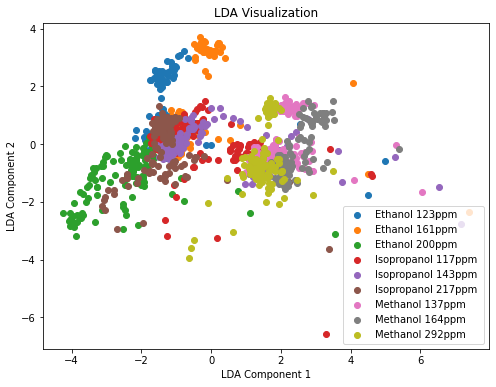

In [309]:
plt.figure(figsize=(8, 6))
for target in targets:
    indices = y_train == target
    plt.scatter(X_train_lda[indices, 0], X_train_lda[indices, 1], label=target)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.legend()
plt.show()

In [232]:
X_test_lda = clf.transform(X_test)

In [233]:
targets = np.unique(y_train)

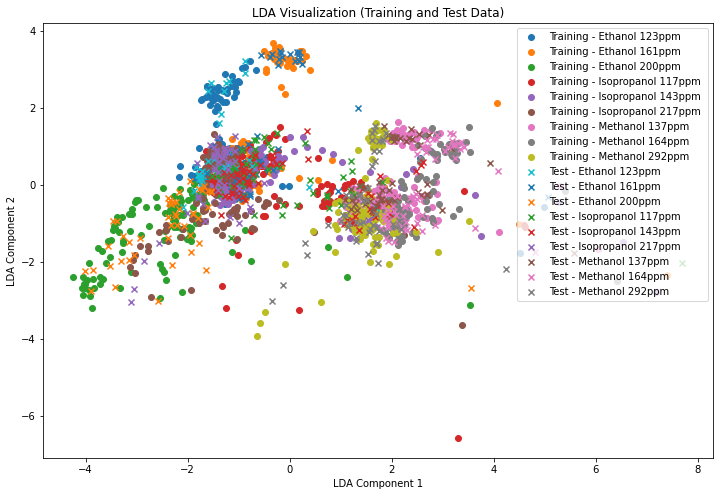

In [234]:
plt.figure(figsize=(12, 8))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(X_train_lda[indices, 0], X_train_lda[indices, 1], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 1], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

# Input for Neural network

In [243]:
df_all = pd.read_excel('combined_data2.xlsx')

In [244]:
target_all = df_all['Target'].value_counts()

In [245]:
target_all

Ethanol 200ppm         175
Ethanol 123ppm         175
Ethanol 161ppm         175
Methanol 292ppm        175
Methanol 137ppm        175
Methanol 164ppm        175
Isopropanol 217ppm     175
Isopropanol 117ppm     175
Isopropanol 143ppm     175
Name: Target, dtype: int64

In [310]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [319]:
len(y_train_encoded)
len(y_test_encoded)

473

In [77]:
#df = pd.read_excel('combined_data2.xlsx')

In [349]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               384       
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 9)                 585       
                                                                 
Total params: 25,737
Trainable params: 25,737
Non-trainable params: 0
_________________________________________________________________


In [350]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [352]:
history = model.fit(X_train_lda, y_train_encoded, epochs=30, batch_size=64, verbose=1)

Epoch 1/30
18/18 [==============================] - 0s 2ms/step - loss: 1.0059 - accuracy: 0.5889
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9696 - accuracy: 0.6044
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9555 - accuracy: 0.6089
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9515 - accuracy: 0.5935
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9603 - accuracy: 0.5989
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9489 - accuracy: 0.6107
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9515 - accuracy: 0.6107
Epoch 8/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9490 - accuracy: 0.6062
Epoch 9/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9340 - accuracy: 0.6098
Epoch 10/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9314 - accuracy: 0.6189
Epoch 11/30
18/18 [

In [354]:
#Evaluate
test_loss, test_acc = model.evaluate(X_test_lda, y_test_encoded)
print(f'Test accuracy: {test_acc}')

15/15 [==============================] - 0s 1ms/step - loss: 1.0057 - accuracy: 0.5941
Test accuracy: 0.5940803289413452


In [328]:
Make predictions using the trained model
predictions = model.predict(X_test_lda)

15/15 [==============================] - 0s 1ms/step


# Second Neural Network

In [329]:
Reshape the input data for the LSTM layer
timesteps = X_train_lda.shape[0]   # Number of samples
n_features = X_train_lda.shape[1]  # Number of features

In [330]:
X_train_reshaped = X_train_lda.reshape(timesteps, 1, n_features)

In [335]:
model = keras.models.Sequential()
model.add(LSTM(64, input_shape=(1, n_features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17152     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 9)                 585       
                                                                 
Total params: 21,897
Trainable params: 21,897
Non-trainable params: 0
_________________________________________________________________


In [337]:
adam = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6, beta_1=0.85, 
                                   beta_2=0.95, epsilon=1e-07, amsgrad=False)

In [338]:
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [339]:
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
35/35 [==============================] - 4s 3ms/step - loss: 2.1245 - accuracy: 0.3013
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 1.9263 - accuracy: 0.3521
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 1.7117 - accuracy: 0.3657
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 1.5709 - accuracy: 0.3966
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 1.4951 - accuracy: 0.3893
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 1.4510 - accuracy: 0.3947
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 1.4184 - accuracy: 0.4029
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 1.3908 - accuracy: 0.4038
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 1.3712 - accuracy: 0.3975
Epoch 10/10
35/35 [==============================] - 0s 3ms/step - loss: 1.3494 - accuracy: 0.4129


In [345]:
#Reshape test data for prediction
X_test_reshaped = X_test_lda.reshape(X_test_lda.shape[0], 1, n_features)

In [347]:
#Evaluate the trained model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test accuracy: {test_acc}')

15/15 [==============================] - 1s 2ms/step - loss: 1.3803 - accuracy: 0.3869
Test accuracy: 0.386892169713974


In [348]:
predictions = model.predict(X_test_reshaped)

15/15 [==============================] - 1s 2ms/step


In [540]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback = [earlystop]

In [582]:
model2.compile(loss="categorical_crossentropy", optimizer=optimizer2, metrics=['accuracy'])

# Seperate Gas Analysis - Compare gas to baseline and test classification accuracy

In [13]:
df_comb3 = pd.DataFrame()

for sheet in selected_sheets:
    # Read each sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet, skiprows=2, usecols=range(13))
    df['Target'] = sheet
    # Append the DataFrame to the combined DataFrame
    df_comb3 = df_comb3.append(df, ignore_index=True)

C:\Users\mdsou\AppData\Local\Temp\ipykernel_8024\515223114.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb3 = df_comb3.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_8024\515223114.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb3 = df_comb3.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_8024\515223114.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb3 = df_comb3.append(df, ignore_index=True)
C:\Users\mdsou\AppData\Local\Temp\ipykernel_8024\515223114.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb3 = df_comb3.append(df, ignore_index=True)


In [14]:
df_comb3.head()

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Blank,LDR (light sensor),Moisture,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,4450,8331,8278,8289,8253,63443,25731,64504,52976,65353,65027,49055,0,Ethanol 200ppm
1,9655,8373,8214,8276,8188,63524,27681,60254,52657,65223,65273,49009,436,Ethanol 200ppm
2,14836,8255,8126,8293,8388,63513,29028,61159,52846,65345,65109,49053,1065,Ethanol 200ppm
3,20017,8314,7945,8267,8230,63601,29817,61726,52787,65318,65260,49007,1749,Ethanol 200ppm
4,25221,8258,7773,8275,8378,63579,30233,61887,52833,65245,65162,49015,2368,Ethanol 200ppm


In [15]:
column_to_drop=[0,8,9,10]

In [16]:
df_comb3 = df_comb3.drop(df_comb3.columns[column_to_drop], axis=1)

In [17]:
df_comb3.head()

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8331,8278,8289,8253,63443,25731,64504,49055,0,Ethanol 200ppm
1,8373,8214,8276,8188,63524,27681,60254,49009,436,Ethanol 200ppm
2,8255,8126,8293,8388,63513,29028,61159,49053,1065,Ethanol 200ppm
3,8314,7945,8267,8230,63601,29817,61726,49007,1749,Ethanol 200ppm
4,8258,7773,8275,8378,63579,30233,61887,49015,2368,Ethanol 200ppm


In [18]:
baseline = pd.read_excel("DATALOG with Cleaning.xlsx", sheet_name="Baseline", header=2)

In [19]:
baseline.head()

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Blank,LDR (light sensor),...,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Total Volatile Organic Compounds (TVOC) (ppb),Oxygen (O2) (%),Humidity (%),Temp (deg C),hic (look into),Unnamed: 18,Unnamed: 19,Unnamed: 20
0,4509,8326,8307,8290,8124,63694,20742,50799,52698,65258,...,49037,0,0,19.28,63,21.1,20.91,2022-12-15,858.0,5min
1,9711,8296,8274,8302,8315,63887,20486,43073,52733,64899,...,49001,400,0,19.26,63,21.0,20.80,NaT,NaN,NaN
2,14892,8357,8282,8285,8337,63822,19986,37340,52644,65330,...,49052,400,0,19.26,63,21.0,20.80,NaT,NaN,NaN
3,20077,8337,8268,8273,8330,63757,19415,33683,52659,65193,...,49059,400,0,19.26,63,21.1,20.91,NaT,NaN,NaN
4,25260,8348,8293,8296,8281,63676,18894,31263,52413,65173,...,49015,400,0,19.27,63,21.2,21.02,NaT,NaN,NaN


array([[<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>]],
      dtype=object)

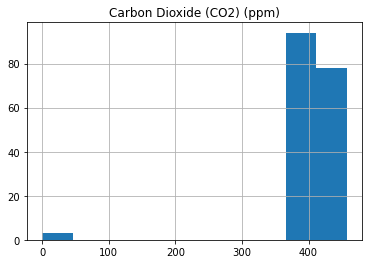

In [37]:
baseline.hist(column='Carbon Dioxide (CO2) (ppm)')

In [38]:
baseline.columns.get_loc('Total Volatile Organic Compounds (TVOC) (ppb)')

13

In [20]:
columns_to_drop = [0, 8, 9, 10]

In [21]:
#Drop all columns except sensor data
baseline = baseline.drop(baseline.columns[columns_to_drop], axis=1)

In [22]:
baseline = baseline.drop(baseline.columns[9:], axis=1)

In [23]:
baseline['Target'] = 'baseline'

In [24]:
baseline.head()

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8326,8307,8290,8124,63694,20742,50799,49037,0,baseline
1,8296,8274,8302,8315,63887,20486,43073,49001,400,baseline
2,8357,8282,8285,8337,63822,19986,37340,49052,400,baseline
3,8337,8268,8273,8330,63757,19415,33683,49059,400,baseline
4,8348,8293,8296,8281,63676,18894,31263,49015,400,baseline


In [45]:
baseline_data = baseline.iloc[:, :-1]
base_label = baseline.iloc[:, -1]

In [46]:
pd.unique(df_comb3['Target'])

array(['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm',
       'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm',
       'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm'],
      dtype=object)

In [47]:
df_comb3.Target.nunique()

9

In [48]:
list(df_comb3.Target.value_counts())

[175, 175, 175, 175, 175, 175, 175, 175, 175]

In [49]:
#baseline = baseline.drop(baseline.columns[-2], axis=1)

In [26]:
categories = df_comb3['Target'].unique()

In [27]:
categories

array(['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm',
       'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm',
       'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm'],
      dtype=object)

In [28]:
dataframe_names = []
for category in categories:
    category_df = df_comb3[df_comb3['Target'] == category].copy()
    
    category = category.replace(" ", "_")
    dataframe_name = f"df_{category}"
    dataframe_names.append(dataframe_name)
    globals()[dataframe_name] = category_df
    
    print(f"DataFrame Name: {dataframe_name}")
    print(category_df.head())
    print("-------------------")

DataFrame Name: df_Ethanol_200ppm
   Ammonia (NH3)-Echem  Nitrogen Dioxide (NO2)  Ethylene  \
0                 8331                    8278      8289   
1                 8373                    8214      8276   
2                 8255                    8126      8293   
3                 8314                    7945      8267   
4                 8258                    7773      8275   

   Carbon Monoxide (CO)  Alcohol- Acetone  Alcohol  Ammonia (NH3)- Ethanol  \
0                  8253             63443    25731                   64504   
1                  8188             63524    27681                   60254   
2                  8388             63513    29028                   61159   
3                  8230             63601    29817                   61726   
4                  8378             63579    30233                   61887   

   Nitric Oxide (NO)  Carbon Dioxide (CO2) (ppm)          Target  
0              49055                           0  Ethanol 200ppm  
1 

In [29]:
dataframe_names

['df_Ethanol_200ppm',
 'df_Ethanol_123ppm',
 'df_Ethanol_161ppm',
 'df_Methanol_292ppm',
 'df_Methanol_137ppm',
 'df_Methanol_164ppm',
 'df_Isopropanol_217ppm_',
 'df_Isopropanol_117ppm',
 'df_Isopropanol_143ppm']

# Ethanol 200ppm

In [30]:
combined_data = pd.concat([df_Ethanol_200ppm, baseline], ignore_index=True)

In [55]:
print(combined_data)

     Ammonia (NH3)-Echem  Nitrogen Dioxide (NO2)  Ethylene  \
0                 8331.0                  8278.0    8289.0   
1                 8373.0                  8214.0    8276.0   
2                 8255.0                  8126.0    8293.0   
3                 8314.0                  7945.0    8267.0   
4                 8258.0                  7773.0    8275.0   
..                   ...                     ...       ...   
345               8359.0                  8270.0    8280.0   
346               8337.0                  8265.0    8277.0   
347               8286.0                  8270.0    8278.0   
348               8333.0                  8272.0    8292.0   
349               8320.0                  8269.0    8280.0   

     Carbon Monoxide (CO)  Alcohol- Acetone  Alcohol  Ammonia (NH3)- Ethanol  \
0                  8253.0           63443.0  25731.0                 64504.0   
1                  8188.0           63524.0  27681.0                 60254.0   
2              

In [56]:
# Separate features and target

X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [57]:
y.unique()

array(['Ethanol 200ppm', 'baseline'], dtype=object)

## Create Vector with means

In [58]:
y = le.fit_transform(y)

In [59]:
import seaborn as sns
sns.set()

In [60]:
combined_data.Target

0      Ethanol 200ppm
1      Ethanol 200ppm
2      Ethanol 200ppm
3      Ethanol 200ppm
4      Ethanol 200ppm
            ...      
345          baseline
346          baseline
347          baseline
348          baseline
349          baseline
Name: Target, Length: 350, dtype: object

In [75]:
#class_feature_means = pd.DataFrame(columns=combined_data.Target)
for c, rows in combined_data.groupby('Target'):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\803427266.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()
C:\Users\mdsou\AppData\Local\Temp\ipykernel_9904\803427266.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


Target,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,Ethanol 200ppm,...,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline,baseline
Ammonia (NH3)-Echem,8226.405714,8226.405714,8226.405714,8226.405714,8226.405714,8226.405714,8226.405714,8226.405714,8226.405714,8226.405714,...,8320.262857,8320.262857,8320.262857,8320.262857,8320.262857,8320.262857,8320.262857,8320.262857,8320.262857,8320.262857
Nitrogen Dioxide (NO2),7023.091429,7023.091429,7023.091429,7023.091429,7023.091429,7023.091429,7023.091429,7023.091429,7023.091429,7023.091429,...,8263.502857,8263.502857,8263.502857,8263.502857,8263.502857,8263.502857,8263.502857,8263.502857,8263.502857,8263.502857
Ethylene,8279.931429,8279.931429,8279.931429,8279.931429,8279.931429,8279.931429,8279.931429,8279.931429,8279.931429,8279.931429,...,8283.371429,8283.371429,8283.371429,8283.371429,8283.371429,8283.371429,8283.371429,8283.371429,8283.371429,8283.371429
Carbon Monoxide (CO),8774.474286,8774.474286,8774.474286,8774.474286,8774.474286,8774.474286,8774.474286,8774.474286,8774.474286,8774.474286,...,8692.645714,8692.645714,8692.645714,8692.645714,8692.645714,8692.645714,8692.645714,8692.645714,8692.645714,8692.645714
Alcohol- Acetone,63482.971429,63482.971429,63482.971429,63482.971429,63482.971429,63482.971429,63482.971429,63482.971429,63482.971429,63482.971429,...,63658.377143,63658.377143,63658.377143,63658.377143,63658.377143,63658.377143,63658.377143,63658.377143,63658.377143,63658.377143
Alcohol,29441.440000,29441.440000,29441.440000,29441.440000,29441.440000,29441.440000,29441.440000,29441.440000,29441.440000,29441.440000,...,15757.611429,15757.611429,15757.611429,15757.611429,15757.611429,15757.611429,15757.611429,15757.611429,15757.611429,15757.611429
Ammonia (NH3)- Ethanol,63037.097143,63037.097143,63037.097143,63037.097143,63037.097143,63037.097143,63037.097143,63037.097143,63037.097143,63037.097143,...,26579.794286,26579.794286,26579.794286,26579.794286,26579.794286,26579.794286,26579.794286,26579.794286,26579.794286,26579.794286
Nitric Oxide (NO),47958.268571,47958.268571,47958.268571,47958.268571,47958.268571,47958.268571,47958.268571,47958.268571,47958.268571,47958.268571,...,49009.857143,49009.857143,49009.857143,49009.857143,49009.857143,49009.857143,49009.857143,49009.857143,49009.857143,49009.857143
Carbon Dioxide (CO2) (ppm),8479.680000,8479.680000,8479.680000,8479.680000,8479.680000,8479.680000,8479.680000,8479.680000,8479.680000,8479.680000,...,406.594286,406.594286,406.594286,406.594286,406.594286,406.594286,406.594286,406.594286,406.594286,406.594286


In [61]:
X_lda = lda.fit_transform(X, y)

In [62]:
lda.explained_variance_ratio_

array([1.])

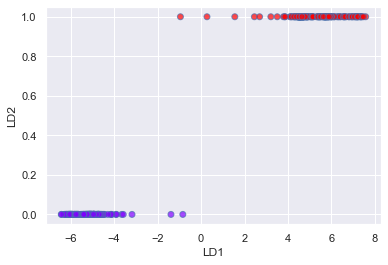

In [63]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    y,
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# Processing

In [65]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 1.0


In [66]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [67]:
X_train_lda.shape

(280, 1)

In [68]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 1.0


In [69]:
lda.explained_variance_ratio_

array([1.])

In [76]:
import matplotlib.pyplot as plt

In [80]:
targets = np.unique(y)

plt.figure(figsize=(8, 6))
for target in targets:
    indices = y_train == target
    plt.scatter(X_train[indices, 0], y_train, label=target)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.legend()
plt.show()

InvalidIndexError: (array([False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True,  True,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False]), 0)

<Figure size 576x432 with 0 Axes>

In [77]:
targets = np.unique(y_train)

ValueError: x and y must be the same size

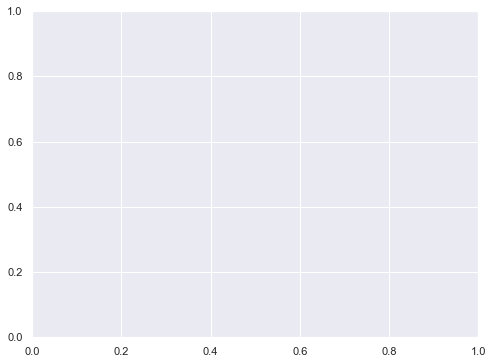

In [86]:
plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

# Input for Neural network

In [222]:
combined_data.head()

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8331,8278,8289,8253,63443,25731,64504,49055,0,Ethanol 200ppm
1,8373,8214,8276,8188,63524,27681,60254,49009,436,Ethanol 200ppm
2,8255,8126,8293,8388,63513,29028,61159,49053,1065,Ethanol 200ppm
3,8314,7945,8267,8230,63601,29817,61726,49007,1749,Ethanol 200ppm
4,8258,7773,8275,8378,63579,30233,61887,49015,2368,Ethanol 200ppm


In [223]:
len(combined_data)

350

In [279]:
target = combined_data['Target'].value_counts()

In [280]:
target

Ethanol 200ppm    175
baseline          175
Name: Target, dtype: int64

In [282]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [284]:
num_classes = np.max(y_train) + 1

In [384]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [399]:
X_train.head()

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm)
306,8330,8264,8289,8250,64149,17251,21427,49028,413
33,8199,6122,8275,8307,63669,30193,64850,47803,11269
178,8337,8268,8273,8330,63757,19415,33683,49059,400
61,8290,7619,8293,9470,63466,26471,62589,48832,486
185,8283,8310,8287,8112,63925,16795,25473,49059,400


In [269]:
combined_data['Target'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Ethanol 200ppm
1      Ethanol 200ppm
2      Ethanol 200ppm
3      Ethanol 200ppm
4      Ethanol 200ppm
            ...      
345          baseline
346          baseline
347          baseline
348          baseline
349          baseline
Name: Target, Length: 350, dtype: object>

In [395]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 64)                128       
                                                                 
 dense_114 (Dense)           (None, 128)               8320      
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                                                 
 dense_116 (Dense)           (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


In [396]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [401]:
history = model.fit(X_train_lda, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 0s 15ms/step - loss: 0.5661 - accuracy: 0.9911 - val_loss: 0.4445 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3707 - accuracy: 0.9955 - val_loss: 0.2590 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.1977 - accuracy: 0.9955 - val_loss: 0.1143 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.0856 - accuracy: 0.9955 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9955 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9955 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=================

In [403]:
# Step 7: Evaluate the trained model
test_loss, test_acc = model.evaluate(X_test_lda, y_test)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

3/3 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Test accuracy: 1.0, Test loss: 0.002047448419034481


# Ethanol 123

In [303]:
categories

array(['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm',
       'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm',
       'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm'],
      dtype=object)

In [326]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
combined_data = pd.concat([df_Ethanol_123ppm, baseline], ignore_index=True)

X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)
"""
plt.figure(figsize=(8, 6))
targets = np.unique(y_train)
for target in targets:
    indices = y_train == target
    plt.scatter(X_train_lda[indices, 0], X_train_lda[indices, 1], label=target)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.legend()
plt.show()
"""
# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)
print(f'\n')

predictions = model.predict(X_test)

Classification accuracy: 1.0
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                128       
                                                                 
 dense_46 (Dense)            (None, 128)               8320      
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10


ValueError: in user code:

    File "C:\Users\mdsou\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mdsou\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mdsou\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mdsou\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mdsou\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mdsou\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_12" "                 f"(type Sequential).
    
    Input 0 of layer "dense_45" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 9)
    
    Call arguments received by layer "sequential_12" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 9), dtype=int64)
      • training=True
      • mask=None


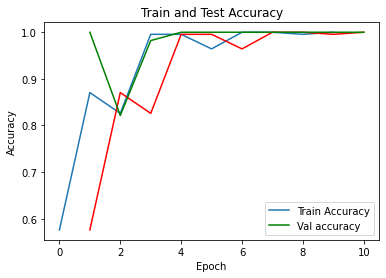

In [297]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(X_test_lda)


# Ethanol 123ppm

In [93]:
print(dataframe_names)

combined_data = pd.concat([df_Ethanol_123ppm, baseline], ignore_index=True)
combined_data.head() 

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8050.0,8402.0,8288.0,8300.0,63466.0,27326.0,64235.0,48771.0,0.0,Ethanol 123ppm
1,8006.0,8085.0,8279.0,8168.0,63264.0,28843.0,63279.0,48671.0,567.0,Ethanol 123ppm
2,7975.0,7636.0,8282.0,8279.0,63654.0,29516.0,63659.0,48592.0,2160.0,Ethanol 123ppm
3,7978.0,6918.0,8291.0,8204.0,63694.0,29817.0,64188.0,48563.0,3425.0,Ethanol 123ppm
4,7991.0,6105.0,8281.0,8312.0,63316.0,30093.0,64648.0,48481.0,4301.0,Ethanol 123ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


49     Ethanol 123ppm
276          baseline
286          baseline
147    Ethanol 123ppm
346          baseline
            ...      
146    Ethanol 123ppm
70     Ethanol 123ppm
304          baseline
310          baseline
308          baseline
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 1.0


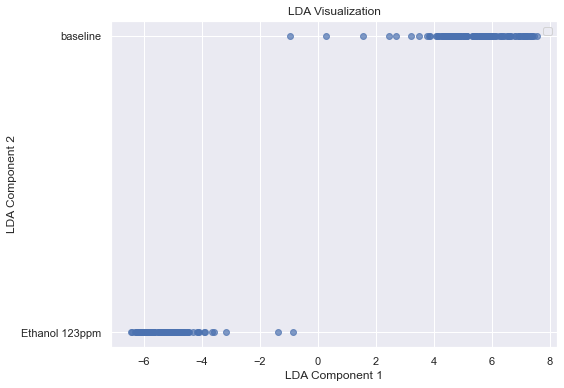

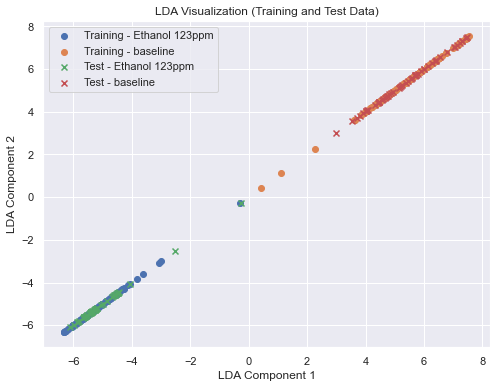

In [95]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)

plt.figure(figsize=(8, 6))
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')

plt.scatter(
    x_lda[:,0],
    y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                128       
                                                                 
 dense_58 (Dense)            (None, 128)               8320      
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dense_60 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 132ms/step - loss: 0.6925 - accuracy: 0.6295 - val_loss: 0.2724 - val_accuracy: 1.0000
Epoch 2/10
7/7 [=======================

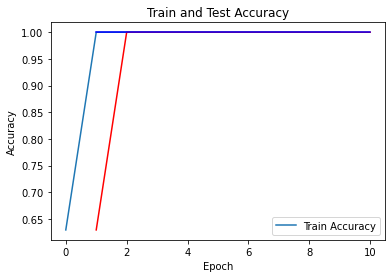

3/3 [==============================] - 0s 3ms/step


In [329]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Ethanol_161ppm 

In [96]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [97]:
combined_data = pd.concat([df_Ethanol_161ppm, baseline], ignore_index=True)
combined_data.head() 

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8062.0,6764.0,8283.0,8350.0,63804.0,28676.0,65256.0,48577.0,0.0,Ethanol 161ppm
1,7994.0,5898.0,8280.0,8332.0,63774.0,29185.0,65436.0,48560.0,1081.0,Ethanol 161ppm
2,7976.0,5226.0,8285.0,8202.0,63756.0,29481.0,65535.0,48531.0,2102.0,Ethanol 161ppm
3,7994.0,4650.0,8283.0,8341.0,63843.0,29713.0,65535.0,48501.0,2611.0,Ethanol 161ppm
4,7957.0,4158.0,8294.0,8367.0,63752.0,29846.0,65535.0,48457.0,3114.0,Ethanol 161ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


91     Ethanol 161ppm
306          baseline
340          baseline
146    Ethanol 161ppm
262          baseline
            ...      
339          baseline
85     Ethanol 161ppm
247          baseline
50     Ethanol 161ppm
329          baseline
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 0.9904761904761905


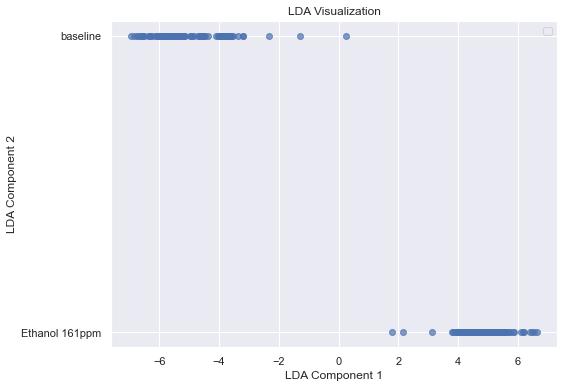

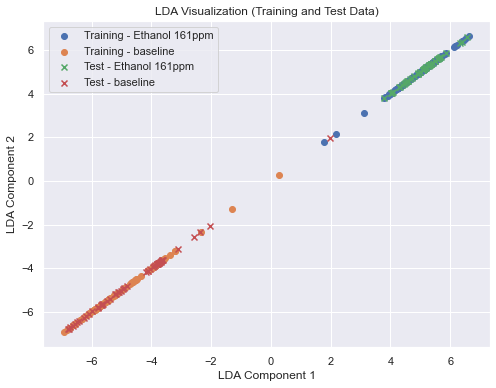

In [100]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)


plt.figure(figsize=(8, 6))
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')

plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 64)                128       
                                                                 
 dense_62 (Dense)            (None, 128)               8320      
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dense_64 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 7s 90ms/step - loss: 0.5409 - accuracy: 0.7679 - val_loss: 0.2636 - val_accuracy: 1.0000
Epoch 2/10
7/7 [========================

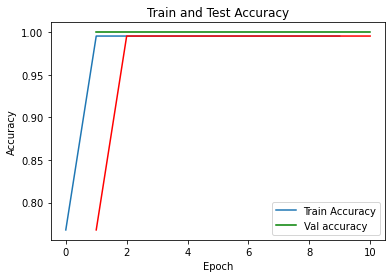

In [337]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Methanol_292ppm 

In [338]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [101]:
combined_data = pd.concat([df_Methanol_292ppm, baseline], ignore_index=True)
combined_data.head() 

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8161.0,8368.0,8305.0,8442.0,63886.0,20879.0,62493.0,48885.0,0.0,Methanol 292ppm
1,8118.0,8252.0,8274.0,8273.0,63469.0,21228.0,63681.0,48815.0,592.0,Methanol 292ppm
2,8111.0,8085.0,8291.0,8487.0,63894.0,21490.0,65464.0,48804.0,1201.0,Methanol 292ppm
3,8172.0,7853.0,8269.0,8222.0,63368.0,21778.0,65535.0,48734.0,1615.0,Methanol 292ppm
4,8096.0,7541.0,8290.0,8543.0,63698.0,22003.0,65535.0,48675.0,1852.0,Methanol 292ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


189           baseline
101    Methanol 292ppm
206           baseline
289           baseline
7      Methanol 292ppm
            ...       
195           baseline
34     Methanol 292ppm
150    Methanol 292ppm
87     Methanol 292ppm
125    Methanol 292ppm
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 0.9904761904761905


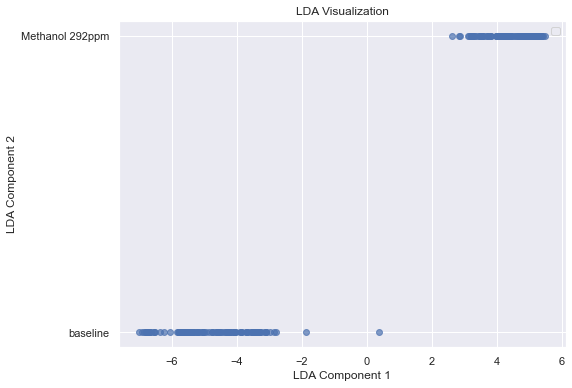

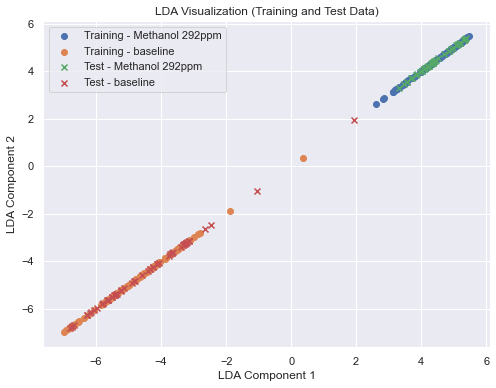

In [102]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)

plt.figure(figsize=(8, 6))
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')

plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 64)                128       
                                                                 
 dense_66 (Dense)            (None, 128)               8320      
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 87ms/step - loss: 0.4996 - accuracy: 0.8080 - val_loss: 0.2934 - val_accuracy: 1.0000
Epoch 2/10
7/7 [========================

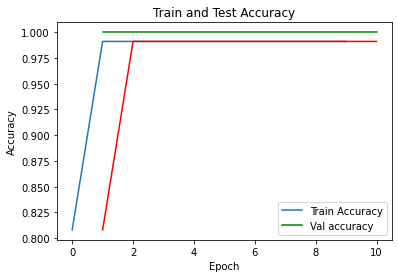

In [341]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Methanol_137ppm 

In [342]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [103]:
combined_data = pd.concat([df_Methanol_137ppm, baseline], ignore_index=True)
combined_data.head() 

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8123.0,8224.0,8288.0,8426.0,63922.0,21448.0,65535.0,48773.0,0.0,Methanol 137ppm
1,8080.0,7551.0,8287.0,8179.0,63770.0,22401.0,65535.0,48662.0,1248.0,Methanol 137ppm
2,8058.0,6603.0,8276.0,8427.0,63804.0,22801.0,65535.0,48491.0,2457.0,Methanol 137ppm
3,8042.0,5566.0,8295.0,8445.0,63557.0,22967.0,65535.0,48361.0,4164.0,Methanol 137ppm
4,7997.0,4547.0,8279.0,8372.0,63953.0,23187.0,65535.0,48450.0,6665.0,Methanol 137ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


248           baseline
35     Methanol 137ppm
21     Methanol 137ppm
38     Methanol 137ppm
42     Methanol 137ppm
            ...       
297           baseline
334           baseline
302           baseline
29     Methanol 137ppm
179           baseline
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 1.0


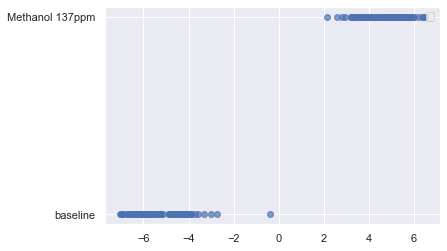

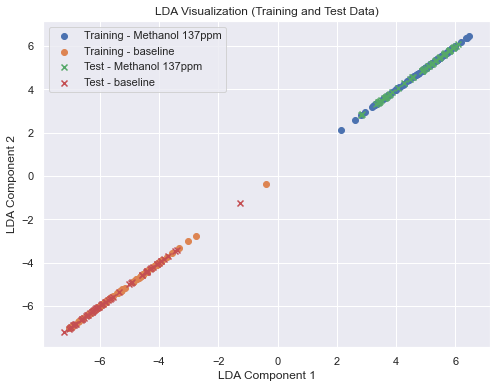

In [104]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)

plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 64)                128       
                                                                 
 dense_70 (Dense)            (None, 128)               8320      
                                                                 
 dense_71 (Dense)            (None, 64)                8256      
                                                                 
 dense_72 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 91ms/step - loss: 0.4486 - accuracy: 0.9464 - val_loss: 0.2488 - val_accuracy: 1.0000
Epoch 2/10
7/7 [========================

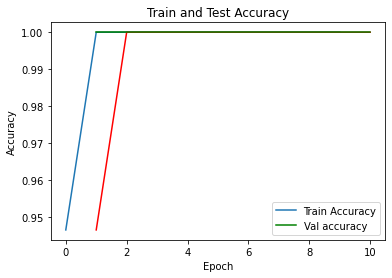

In [345]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Methanol_164ppm 

In [346]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [107]:
combined_data = pd.concat([df_Methanol_164ppm, baseline], ignore_index=True)
combined_data.head() 

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,7951.0,7526.0,8287.0,8606.0,64074.0,22293.0,65535.0,48494.0,0.0,Methanol 164ppm
1,7916.0,6514.0,8281.0,8429.0,63719.0,22787.0,65535.0,48507.0,1081.0,Methanol 164ppm
2,7951.0,5363.0,8273.0,8513.0,63521.0,23034.0,65535.0,48529.0,2486.0,Methanol 164ppm
3,7904.0,4403.0,8285.0,8455.0,63709.0,23179.0,65535.0,48528.0,4184.0,Methanol 164ppm
4,7970.0,3675.0,8282.0,8655.0,63848.0,23285.0,65535.0,48497.0,6484.0,Methanol 164ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


249           baseline
231           baseline
110    Methanol 164ppm
31     Methanol 164ppm
233           baseline
            ...       
203           baseline
63     Methanol 164ppm
118    Methanol 164ppm
344           baseline
64     Methanol 164ppm
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 1.0


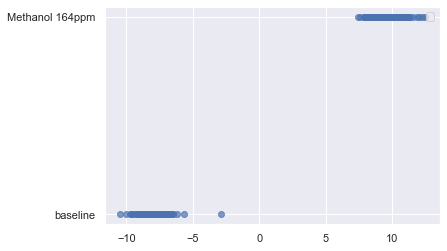

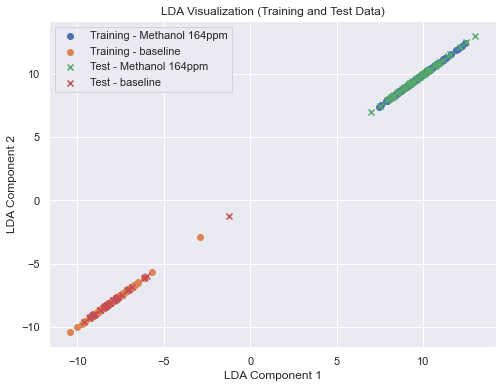

In [108]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)
plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 64)                128       
                                                                 
 dense_74 (Dense)            (None, 128)               8320      
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 dense_76 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 105ms/step - loss: 0.3254 - accuracy: 0.9241 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 2/10
7/7 [=======================

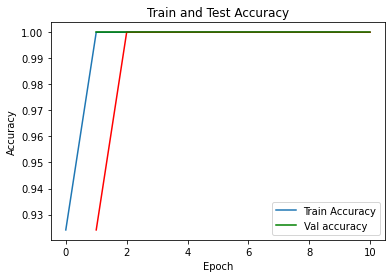

In [349]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Isopropanol_217ppm

In [350]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [3]:
combined_data = pd.concat([df_Isopropanol_217ppm_, baseline], ignore_index=True)
combined_data.head() 

NameError: name 'pd' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


23     Isopropanol 217ppm 
307               baseline
341               baseline
40     Isopropanol 217ppm 
112    Isopropanol 217ppm 
              ...         
108    Isopropanol 217ppm 
265               baseline
221               baseline
121    Isopropanol 217ppm 
279               baseline
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 0.9904761904761905


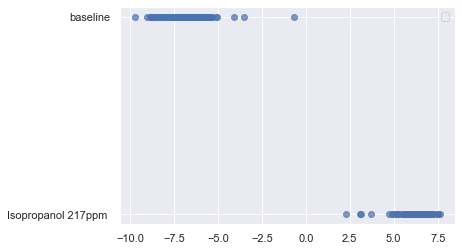

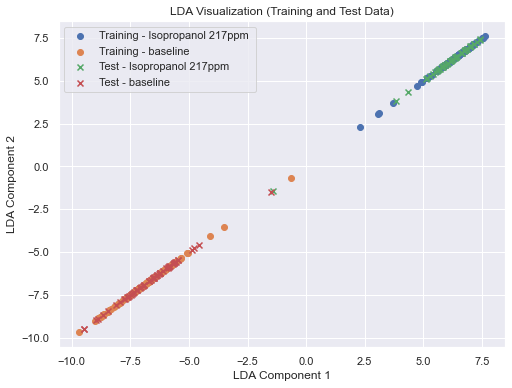

In [110]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)
plt.figure(figsize=(8, 6))

plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)


# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 64)                128       
                                                                 
 dense_102 (Dense)           (None, 128)               8320      
                                                                 
 dense_103 (Dense)           (None, 64)                8256      
                                                                 
 dense_104 (Dense)           (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 84ms/step - loss: 0.5300 - accuracy: 0.7321 - val_loss: 0.3311 - val_accuracy: 1.0000
Epoch 2/10
7/7 [========================

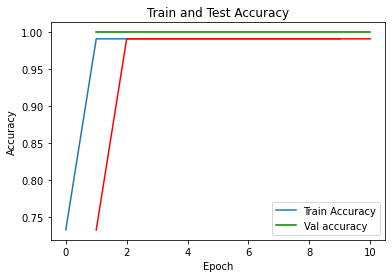

In [374]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Isopropanol_117ppm 

In [354]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [111]:
combined_data = pd.concat([df_Isopropanol_117ppm, baseline], ignore_index=True)
combined_data.head() 

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,7971.0,7762.0,8213.0,9211.0,63620.0,13672.0,65535.0,50058.0,0.0,Isopropanol 117ppm
1,7948.0,7044.0,8290.0,9099.0,63706.0,20529.0,65535.0,49891.0,686.0,Isopropanol 117ppm
2,7934.0,6147.0,8280.0,9179.0,63635.0,25319.0,65535.0,49627.0,1636.0,Isopropanol 117ppm
3,7928.0,5338.0,8280.0,9235.0,63730.0,27405.0,65535.0,49279.0,1946.0,Isopropanol 117ppm
4,7938.0,4723.0,8281.0,9231.0,63716.0,28336.0,65535.0,48940.0,2197.0,Isopropanol 117ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


317              baseline
127    Isopropanol 117ppm
41     Isopropanol 117ppm
56     Isopropanol 117ppm
269              baseline
              ...        
10     Isopropanol 117ppm
42     Isopropanol 117ppm
52     Isopropanol 117ppm
140    Isopropanol 117ppm
186              baseline
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 1.0


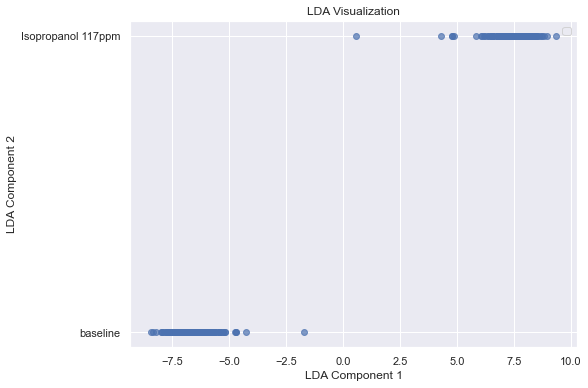

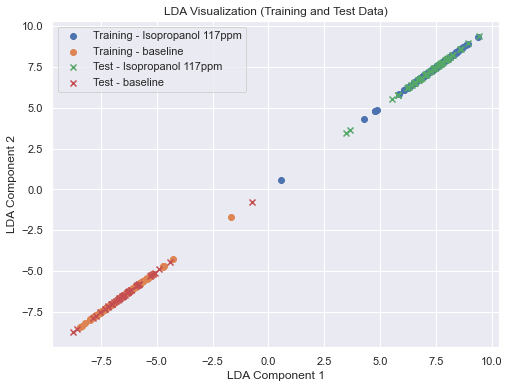

In [113]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)

plt.figure(figsize=(8, 6))

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()


X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 64)                128       
                                                                 
 dense_98 (Dense)            (None, 128)               8320      
                                                                 
 dense_99 (Dense)            (None, 64)                8256      
                                                                 
 dense_100 (Dense)           (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 95ms/step - loss: 0.4480 - accuracy: 0.9286 - val_loss: 0.2578 - val_accuracy: 1.0000
Epoch 2/10
7/7 [========================

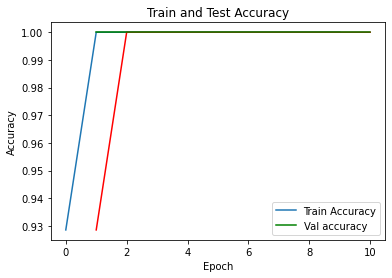

In [369]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

# Isopropanol_143ppm 

In [358]:
print(dataframe_names)

['df_Ethanol_200ppm', 'df_Ethanol_123ppm', 'df_Ethanol_161ppm', 'df_Methanol_292ppm', 'df_Methanol_137ppm', 'df_Methanol_164ppm', 'df_Isopropanol_217ppm_', 'df_Isopropanol_117ppm', 'df_Isopropanol_143ppm']


In [114]:
combined_data = pd.concat([df_Isopropanol_143ppm, baseline], ignore_index=True)
combined_data.head() 

,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Nitric Oxide (NO),Carbon Dioxide (CO2) (ppm),Target
0,8008.0,7679.0,8284.0,9484.0,63372.0,12179.0,63178.0,49259.0,0.0,Isopropanol 143ppm
1,7975.0,6684.0,8283.0,9420.0,64016.0,17466.0,65535.0,49908.0,759.0,Isopropanol 143ppm
2,7962.0,5646.0,8285.0,9452.0,63464.0,23582.0,65535.0,50559.0,1660.0,Isopropanol 143ppm
3,7999.0,4686.0,8280.0,9544.0,63360.0,26477.0,65535.0,50988.0,1925.0,Isopropanol 143ppm
4,7999.0,3922.0,8278.0,9488.0,63466.0,27691.0,65535.0,51239.0,2166.0,Isopropanol 143ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


271              baseline
238              baseline
67     Isopropanol 143ppm
101    Isopropanol 143ppm
70     Isopropanol 143ppm
              ...        
24     Isopropanol 143ppm
164    Isopropanol 143ppm
310              baseline
199              baseline
155    Isopropanol 143ppm
Name: Target, Length: 245, dtype: object


(245, 1)


Classification accuracy: 0.9809523809523809


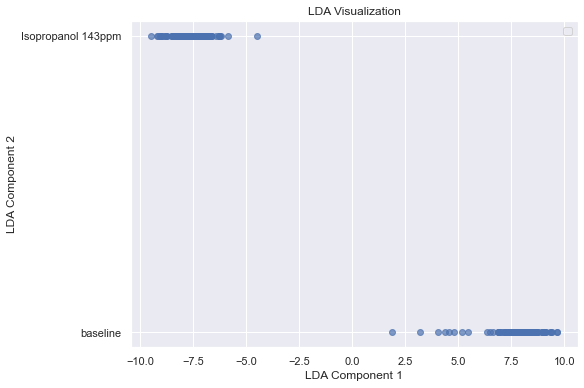

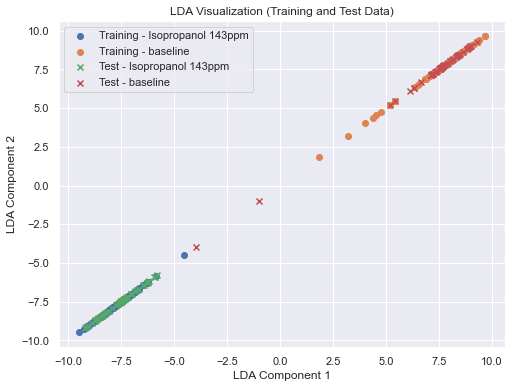

In [115]:
# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

y.unique()

# Split the data sets for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train)
print(f'\n')
# Create the LDA object
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

print(x_lda.shape)
print(f'\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

import matplotlib.pyplot as plt
targets = np.unique(y)

plt.figure(figsize=(8, 6))

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.show()

X_test_lda = lda.transform(X_test)
targets = np.unique(y_train)

plt.figure(figsize=(8, 6))

# Plot training data
for target in targets:
    indices = y_train == target
    plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

# Plot test data
for target in targets:
    indices = y_test == target
    plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization (Training and Test Data)')
plt.legend()
plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 64)                128       
                                                                 
 dense_94 (Dense)            (None, 128)               8320      
                                                                 
 dense_95 (Dense)            (None, 64)                8256      
                                                                 
 dense_96 (Dense)            (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 89ms/step - loss: 0.4806 - accuracy: 0.7812 - val_loss: 0.1935 - val_accuracy: 1.0000
Epoch 2/10
7/7 [========================

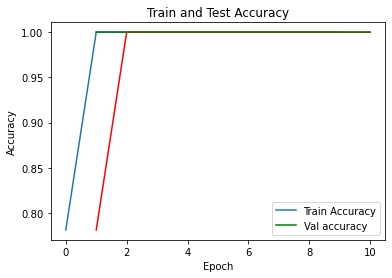

In [366]:
X = combined_data.iloc[:, :-1].values
y = combined_data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Determine the number of classes -Automated way
num_classes = np.max(y_train) + 1

# Convert the labels to one-hot encoded vectors (Needed after encoder but only for this NN input)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_lda.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()
print(f'\n')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
print(f'\n')

_, accuracy = model.evaluate(X_test_lda, y_test_encoded)
print('Test Accuracy:', accuracy)
print(f'\n')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#predictions = model.predict(X_test_lda)

## Create Function for future uses

In [35]:
def Enose(sheet_name):
    combined_data = pd.concat([sheet_name, baseline], ignore_index=True)
    combined_data.head() 
    # Separate features and target
    X = combined_data.iloc[:, :-1]
    y = combined_data.iloc[:, -1]

    y.unique()
    label_encoder = LabelEncoder()

    # Split the data sets for training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    print(y_train)
    print(f'\n')
    # Create the LDA object
    num_classes = np.max(y_train) + 1

    lda = LinearDiscriminantAnalysis()
    x_lda = lda.fit_transform(X_train, y_train)
    y_pred = lda.predict(X_test)

    print(x_lda.shape)
    print(f'\n')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Classification accuracy:", accuracy)

    import matplotlib.pyplot as plt
    targets = np.unique(y)

    plt.figure(figsize=(8, 6))

    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.title('LDA Visualization')
    plt.scatter(
    x_lda[:,0],
    y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
    )
    plt.legend()
    plt.show()

    X_test_lda = lda.transform(X_test)
    targets = np.unique(y_train)

    plt.figure(figsize=(8, 6))

    # Plot training data
    for target in targets:
        indices = y_train == target
        plt.scatter(x_lda[indices, 0], x_lda[indices, 0], label=f'Training - {target}')

    # Plot test data
    for target in targets:
        indices = y_test == target
        plt.scatter(X_test_lda[indices, 0], X_test_lda[indices, 0], marker='x', label=f'Test - {target}')

    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.title('LDA Visualization (Training and Test Data)')
    plt.legend()
    plt.show()
    
    y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
    y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

    # Initialize the model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_lda.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.summary()
    print(f'\n')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_lda, y_train_encoded, epochs=10, batch_size=32, validation_split=.2)
    print(f'\n')

    _, accuracy = model.evaluate(X_test_lda, y_test_encoded)
    print('Test Accuracy:', accuracy)
    print(f'\n')

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Val accuracy')
    plt.title('Train and Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0]


(245, 1)


Classification accuracy: 0.9809523809523809


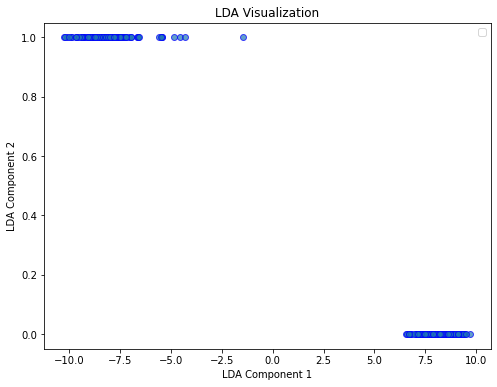

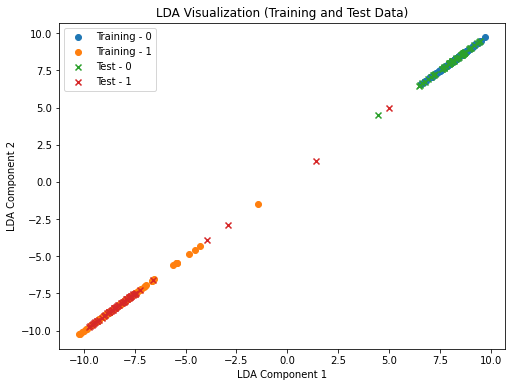

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 16,834
Trainable params: 16,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 52ms/step - loss: 0.5714 - accuracy: 0.7908 - val_loss: 0.3352 - val_accuracy: 1.0000
Epoch 2/10
7/7 [===========================

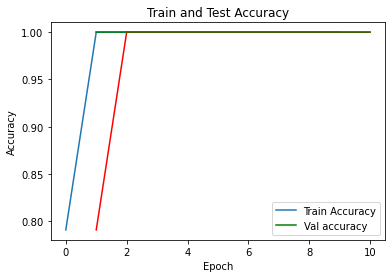

In [36]:
Enose(df_Isopropanol_143ppm)